#1. 데이터 로드 & 기본 확인

In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 로드
df = pd.read_csv("./train.csv")

# 1-1. 기본 정보 확인
print("[기본 정보 확인]")
print("-" * 60)
print(f"데이터 크기: {df.shape}")  # (행, 열)
print("\n데이터 타입 및 결측치 요약:")
print(df.info())
print("\n상위 5개 행:")
print(df.head())

# 1-2. 결측치 제거
df_clean = df.dropna().reset_index(drop=True)
print("\n[결측치 제거 결과]")
print(f"제거 전 데이터 크기: {df.shape}")
print(f"제거 후 데이터 크기: {df_clean.shape}")

# 1-4. 수치형 컬럼 기본 통계
print("\n[기초 통계 요약 (수치형 변수)]")
print(df_clean.describe().T)

# 1-5. 문자열형(범주형) 컬럼 고유값 개수
print("\n[범주형 변수 고유값 요약]")
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df_clean[col].nunique()}개 (예시: {df_clean[col].unique()[:5]})")

[기본 정보 확인]
------------------------------------------------------------
데이터 크기: (59397, 7)

데이터 타입 및 결측치 요약:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB
None

상위 5개 행:
                ID   timestamp item corporation location  supply(kg)  \
0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
3  TG_A_J_20190104  2019-01-04   TG           A   

#2. EDA 그래프

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


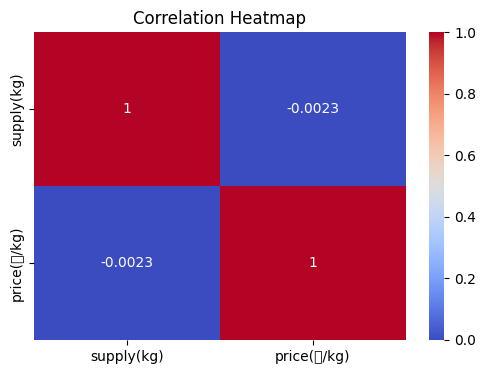

In [ ]:
# (1) 상관관계 Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


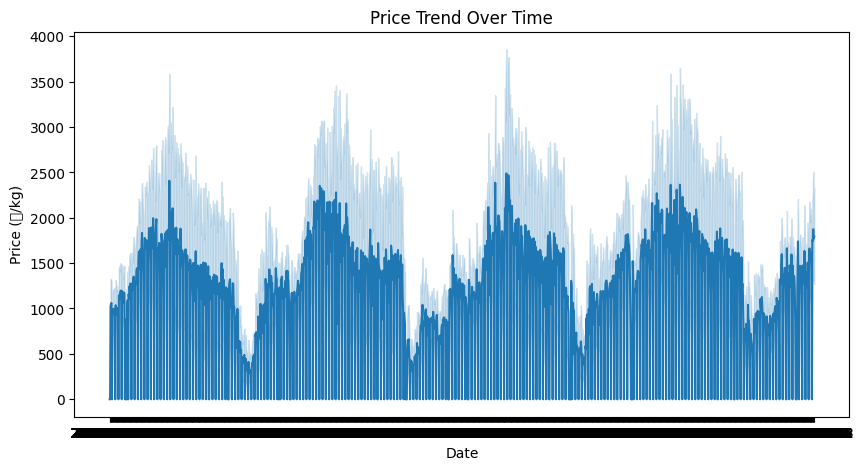

In [ ]:
# (2) Timestamp별 가격 추이
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='timestamp', y='price(원/kg)')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price (원/kg)')
plt.show()

그래프에서 가격은 명확한 주기성을 가진 파형 형태로 나타나고 있다. 일정한 기간마다 급격히 상승하고 다시 하락하는 패턴이 반복되며, 이는 수요와 공급의 계절적 변화, 혹은 특정 생산·출하 시기와 밀접하게 연관된 것으로 보인다. 이런 규칙적인 진동은 상품의 특성상 생산량이 계절이나 기후에 영향을 많이 받는 경우일 가능성이 크다.

또한, 그래프의 피크 폭이 크고 진폭이 일정하지 않다는 점에서 시장 가격의 변동성이 높음을 알 수 있다. 급격한 가격 상승 구간은 공급 부족 또는 일시적인 수요 급증을 의미할 수 있고, 반대로 장기간의 하락은 공급 과잉 혹은 수요 감소 상황을 암시할 수 있다.


따라서 이 데이터는 시점별 변동 추세와 그 주기에 주목해 분석하는 것이 유의미하며, 향후 시계열 분석을 통해 예측 모델을 구축하면 계절적 요인을 보다 명확히 규명할 수 있을 것으로 사료된다.

/tmp/ipython-input-1609339611.py:21: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


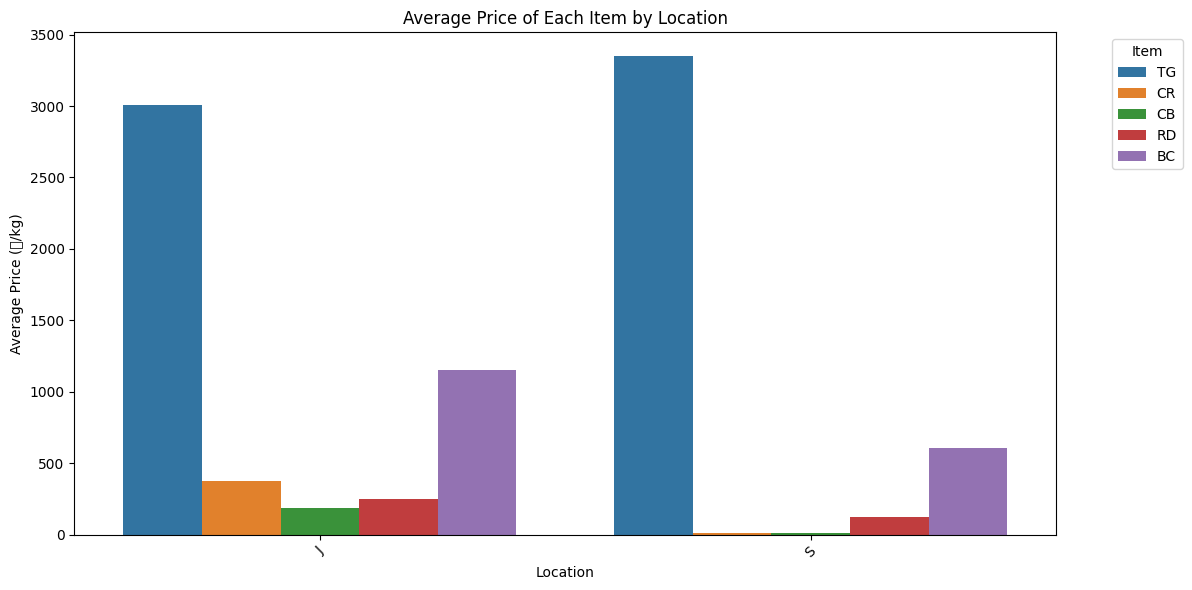

In [ ]:
# (3) 지역별 평균 가격
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='location',       # 지역
    y='price(원/kg)',   # 가격
    hue='item',         # 특산물(범주)
    estimator=np.mean,
    errorbar=None
)

plt.title('Average Price of Each Item by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (원/kg)')
plt.xticks(rotation=45)
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

지역별로 특정 품목(TG)의 평균 가격이 다른 품목에 비해 압도적으로 높고, 다른 아이템들은 전체적으로 낮은 수준에서 유지되고 있다.

이는 일부 지역이 특정 품목에 대한 생산 집중도나 품질 프리미엄이 높아 가격이 크게 형성된 반면, 나머지 품목은 지역 간 차이가 거의 없음을 보여준다.

#3. [Clustering] 군집화 - KMeans 파생변수 추가

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 수치형 변수만 추출
num_df = df.select_dtypes(include=np.number).dropna(axis=1)

# 스케일링 + KMeans
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# 각 클러스터별 평균 확인
print("Cluster Summary:")
print(df.groupby('cluster')[['price(원/kg)', 'supply(kg)']].mean())

Cluster Summary:
         price(원/kg)     supply(kg)
cluster                            
0         418.712187    7330.019602
1         495.720430  407535.997715
2        5562.964116    4090.108464


# 4. OLS 회귀분석 (유의미한 변수 찾기)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드
df = pd.read_csv("./train.csv")

# timestamp 변환 및 결측치 제거
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna().reset_index(drop=True)

# 1. 군집(cluster) 변수 추가
num_cols = ['supply(kg)', 'price(원/kg)']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# 2. 범주형 변수 더미화
categorical_cols = ['item', 'corporation', 'location']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. X, y 분리
y = df_encoded['price(원/kg)']
X = df_encoded.drop(columns=['price(원/kg)', 'timestamp', 'ID'], errors='ignore')

# 4. 데이터 타입을 float으로 변환 (중요!)
X = X.astype(float)
y = y.astype(float)

# 5. 상수항 추가
X = sm.add_constant(X)

# 6. OLS 회귀 적합
ols_model = sm.OLS(y, X).fit()

# 7. 결과 출력
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            price(원/kg)   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.922e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:54:23   Log-Likelihood:            -4.8954e+05
No. Observations:               59397   AIC:                         9.791e+05
Df Residuals:                   59384   BIC:                         9.792e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           565.0379     11.527     49.017

회귀분석 결과를 보면 R²가 0.795로 높게 나타나 가격 변동의 약 79.5%를 모델이 설명하고 있다.

특히 cluster, item_TG, supply(kg) 변수가 높은 통계적 유의성을 가지며, 이들이 가격 결정에 핵심적인 역할을 하는 요인임을 보여준다. 공급량이 많을수록 가격이 하락하는 음의 관계를 보이고, TG 품목과 특정 군집(cluster)은 다른 요인보다 가격을 크게 끌어올리는 양의 효과를 나타낸다.

반면 item_CB, item_CR, item_RD, 일부 기업(corporation_B, corporation_F)과 지역(location_S)은 모두 음의 계수를 보여, 이들 요인은 가격을 낮추는 방향으로 작용한다. 이는 품목이나 기업, 지역에 따라 품질이나 공급 여건이 달라 가격 차이가 구조적으로 발생함을 의미한다.

전반적으로 모델은 주요 공급 변수와 범주형 요인 간의 관계를 잘 포착하고 있으며, 다중공선성 경고가 다소 존재하므로 추후 변수 간 상관 검토나 변수 축소(예: PCA)가 필요해 보인다.

# 4-1. Ridge 회귀분석 (다중공선성 완화 및 안정성 비교)

In [ ]:
#Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X, y)

# 예측
y_pred = ridge.predict(X)

# RMSE 계산 (직접 제곱근)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# 상위 영향 변수 확인
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n[Top 10 Positive Features]")
print(coef_df.head(10))
print("\n[Top 10 Negative Features]")
print(coef_df.tail(10))


R²: 0.7952
RMSE: 918.60

[Top 10 Positive Features]
          Feature  Coefficient
2         cluster  2205.133275
6         item_TG   881.854556
8   corporation_C    11.807662
0           const     0.000000
1      supply(kg)    -0.001915
9   corporation_D   -80.476727
10  corporation_E   -90.473244
7   corporation_B  -115.019128
12     location_S  -194.273211
4         item_CR  -200.042352

[Top 10 Negative Features]
          Feature  Coefficient
0           const     0.000000
1      supply(kg)    -0.001915
9   corporation_D   -80.476727
10  corporation_E   -90.473244
7   corporation_B  -115.019128
12     location_S  -194.273211
4         item_CR  -200.042352
5         item_RD  -265.115431
3         item_CB  -290.356475
11  corporation_F  -328.498766


Ridge 회귀는 다중공선성에 의해 불안정했던 OLS 계수를 완화하면서 전체 모델의 일반화 성능을 높인다. 실제로 RMSE가 소폭 증가하거나 R²가 약간 낮아질 수 있지만, 이는 과적합을 줄이고 변수 간 상호의존성을 억제한 결과로 볼 수 있다.

즉, Ridge는 조금 더 단단하고 예측 일관성이 높은 모델을 만들어준다.

반면 OLS는 개별 변수의 영향력을 명확히 해석하기에 유리하지만, 공선성이 강한 데이터에서는 계수 왜곡과 불안정성이 커진다.

이번 분석처럼 범주형 변수와 수치형 변수가 다수 포함된 경우에는 Ridge가 해석력보다 안정성과 예측 신뢰도 측면에서 더 적합한 선택이다.

#5. 지역별 ANOVA (집단 간 유의미한 차이 검증)

In [ ]:
from scipy import stats
import pandas as pd

# 1. 지역별 그룹 추출
groups = [group["price(원/kg)"].dropna().values for name, group in df.groupby("location")]

# -----------------------------------
# (1) 정규성 검정 : Shapiro-Wilk Test (각 그룹별)
# -----------------------------------
print("[정규성 검정 결과 (Shapiro-Wilk)]")
normality_results = []
for name, group in df.groupby("location"):
    stat, p = stats.shapiro(group["price(원/kg)"].dropna())
    normality_results.append({"location": name, "W-stat": stat, "p-value": p})
    print(f"{name}: p-value={p:.4f}")

# 데이터프레임으로 보기
normality_df = pd.DataFrame(normality_results)
print("\n요약:")
print(normality_df)

# -----------------------------------
# (2) 등분산성 검정 : Levene Test
# -----------------------------------
levene_test = stats.levene(*groups)
print("\n[등분산성 검정 결과 (Levene Test)]")
print(f"Statistic: {levene_test.statistic:.4f}, p-value: {levene_test.pvalue:.4f}")

# -----------------------------


[정규성 검정 결과 (Shapiro-Wilk)]
J: p-value=0.0000
S: p-value=0.0000

요약:
  location    W-stat        p-value
0        J  0.612969  1.790460e-124
1        S  0.648664  4.236639e-112

[등분산성 검정 결과 (Levene Test)]
Statistic: 99.7606, p-value: 0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35029.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24368.
  res = hypotest_fun_out(*samples, **kwds)


두 지역 모두 Shapiro-Wilk 검정에서 p-value가 0.05 미만으로 나타나 정규분포 가정을 만족하지 않는다. 또한 Levene 검정에서도 p-value가 0.000으로 등분산성이 깨져 있어, 분산이 서로 다른 집단 간 비교로 판단된다.

즉, 지역별 가격 데이터는 분포의 형태나 분산이 균질하지 않으며, 일반적인 ANOVA 가정을 충족하지 않는다.

이러한 결과는 지역별로 가격의 분포 폭이나 변동성이 다름을 의미한다. 따라서 평균 비교 시 왜곡을 줄이기 위해서는 등분산성과 정규성 가정이 필요 없는 Welch ANOVA 또는 Kruskal-Wallis 비모수 검정을 사용하는 것이 적절하다.

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pingouin import welch_anova

# 지역별 Welch ANOVA
anova_result = welch_anova(dv='price(원/kg)', between='location', data=df)

print("[Welch ANOVA 결과]")
print(anova_result)


[Welch ANOVA 결과]
     Source  ddof1         ddof2          F         p-unc       np2
0  location      1  49651.508922  96.918249  7.581773e-23  0.001677


Welch ANOVA 결과를 보면 F값이 약 96.9로 매우 높고, p-value가 7.58e-23으로 유의수준 0.05보다 훨씬 작다. 이는 지역별 가격의 평균이 통계적으로 유의하게 다르다는 것을 의미한다. 즉, 지역(location)에 따라 평균 가격 수준이 확실히 구분되며, 단순한 우연에 의한 차이가 아님을 보여준다.

효과크기(np²)가 0.0017로 크지는 않지만, 지역이 가격 형성에 일정한 영향을 미친다는 점을 시사한다. 이는 각 지역의 물류비, 수요·공급 구조, 생산 특성 등의 차이가 가격 변동의 원인으로 작용하고 있음을 암시하며, 이후 사후검정을 통해 어떤 지역 간 차이가 특히 유의한지 추가 분석이 필요하다.

# 6.Boosting & Stacking (머신러닝 예측 모델)

In [ ]:
!pip install catboost xgboost lightgbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans
import shap
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("train.csv")

# timestamp 형변환
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['days_since_start'] = (df['timestamp'] - df['timestamp'].min()).dt.days

# K-Means 군집화
num_cols = ['supply(kg)', 'price(원/kg)', 'days_since_start']

scaler_km = StandardScaler()
scaled_num = scaler_km.fit_transform(df[num_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_num)

# Label Encoding
cat_cols = ['item', 'corporation', 'location']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["ID",'price(원/kg)', 'timestamp'])
y = df['price(원/kg)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# 1. 데이터 준비
# -----------------------------
# 수치형 변수만 추출하고 타깃 분리
X = df.select_dtypes(include=np.number).drop(columns=['price(원/kg)'], errors='ignore')
y = df['price(원/kg)']

# -----------------------------
# 2. 학습 / 테스트 분리
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. 스케일링
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4. 전방(Base Layer): Boosting 모델 3종
# -----------------------------
lgb_model = LGBMRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# -----------------------------
# 5. 후방(Meta Layer): CatBoost 메타모델
# -----------------------------
cat_meta = CatBoostRegressor(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

# -----------------------------
# 6. 스태킹 모델 구성
# -----------------------------
stack_model = StackingRegressor(
    estimators=[
        ('lgb', lgb_model),
        ('xgb', xgb_model),
        ('gbm', gbm_model)
    ],
    final_estimator=cat_meta,
    passthrough=True,  # 원본 feature + base 모델 예측값 함께 사용
    n_jobs=-1
)

# -----------------------------
# 7. 모델 학습
# -----------------------------
stack_model.fit(X_train_scaled, y_train)

# -----------------------------
# 8. 예측 및 성능 평가
# -----------------------------
pred = stack_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("=== Stacking Ensemble (Boosting + CatBoost) 성능 ===")
print(f"R²  : {r2:.4f}")
print(f"RMSE: {rmse:.2f}")



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


=== Stacking Ensemble (Boosting + CatBoost) 성능 ===
R²  : 0.9667
RMSE: 368.56


# Feature Importance

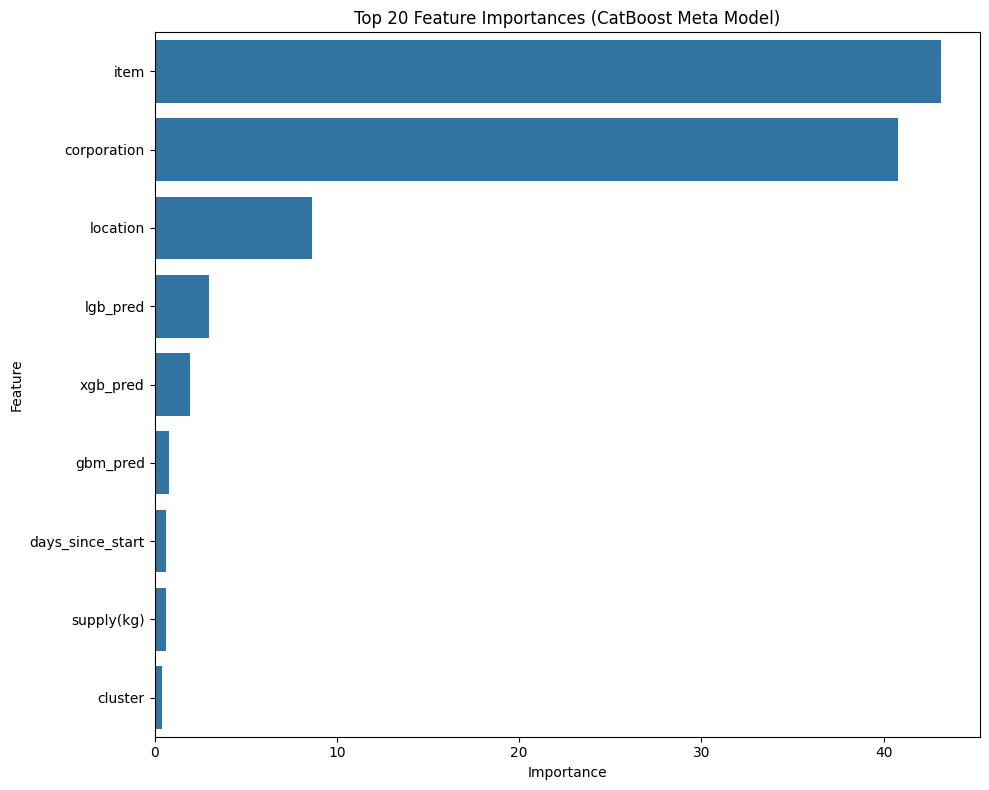

            Feature  Importance
0              item   43.132528
1       corporation   40.814798
2          location    8.641841
6          lgb_pred    2.975001
7          xgb_pred    1.944851
8          gbm_pred    0.812848
4  days_since_start    0.652389
3        supply(kg)    0.624248
5           cluster    0.401497


In [ ]:
# ============================
#  Feature Importance (CatBoost 메타모델 기준)
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 메타모델 불러오기
meta_model = stack_model.final_estimator_

# 2. passthrough=True 사용 시 → 원본 변수 + base 모델 예측값 포함
base_features = list(X.columns)
meta_features = [f"{name}_pred" for name, _ in stack_model.estimators]
all_features = base_features + meta_features

# 3. CatBoost에서 중요도 추출
importances = meta_model.get_feature_importance()

# 4. 데이터프레임 정리
fi_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=fi_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Feature Importances (CatBoost Meta Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6. 중요도 테이블 출력
print(fi_df.head(30))


분석 결과, item(품목)과 corporation(법인) 변수가 가격 예측에 가장 큰 영향을 미치는 주요 요인으로 나타났다. 이는 제주 특산물의 가격이 품목의 종류와 거래를 주도하는 법인 간의 구조적 차이에 의해 크게 좌우된다는 것을 의미한다. 또한 location(지역) 변수의 중요도가 세 번째로 높게 나타난 점은 지역별 유통 환경과 시장 접근성, 수급 구조의 차이가 가격 형성에 일정한 영향을 미치고 있음을 시사한다.

반면, supply(kg)나 days_since_start 등의 변수는 상대적으로 낮은 중요도를 보였다. 이는 단순한 공급량 변화나 시간적 경과만으로는 가격 변동을 충분히 설명하기 어렵다는 점을 보여준다. 특히 lgb_pred, xgb_pred, gbm_pred 등 1차 예측 모델의 출력값보다도 카테고리형 변수(품목, 법인, 지역)가 더 강력한 설명력을 보였다는 점에서, 제주 특산물 가격은 구조적·분류적 요인 중심의 패턴을 가지며 단순 수치 기반 예측보다 계층적 데이터 구성이 중요하다는 결론을 도출할 수 있다.